# Imports

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf

%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Setup

In [2]:
import gym
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
obs = env.reset()

In [4]:
obs

array([-0.0124603 ,  0.02103584,  0.00858452,  0.0333533 ])

In [5]:
pos, vel, ang, ang_vel = obs
print(pos)
print(vel)
print(ang)
print(ang_vel)

-0.012460304485186292
0.021035836916257267
0.0085845202814804
0.03335330324504665


In [6]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>


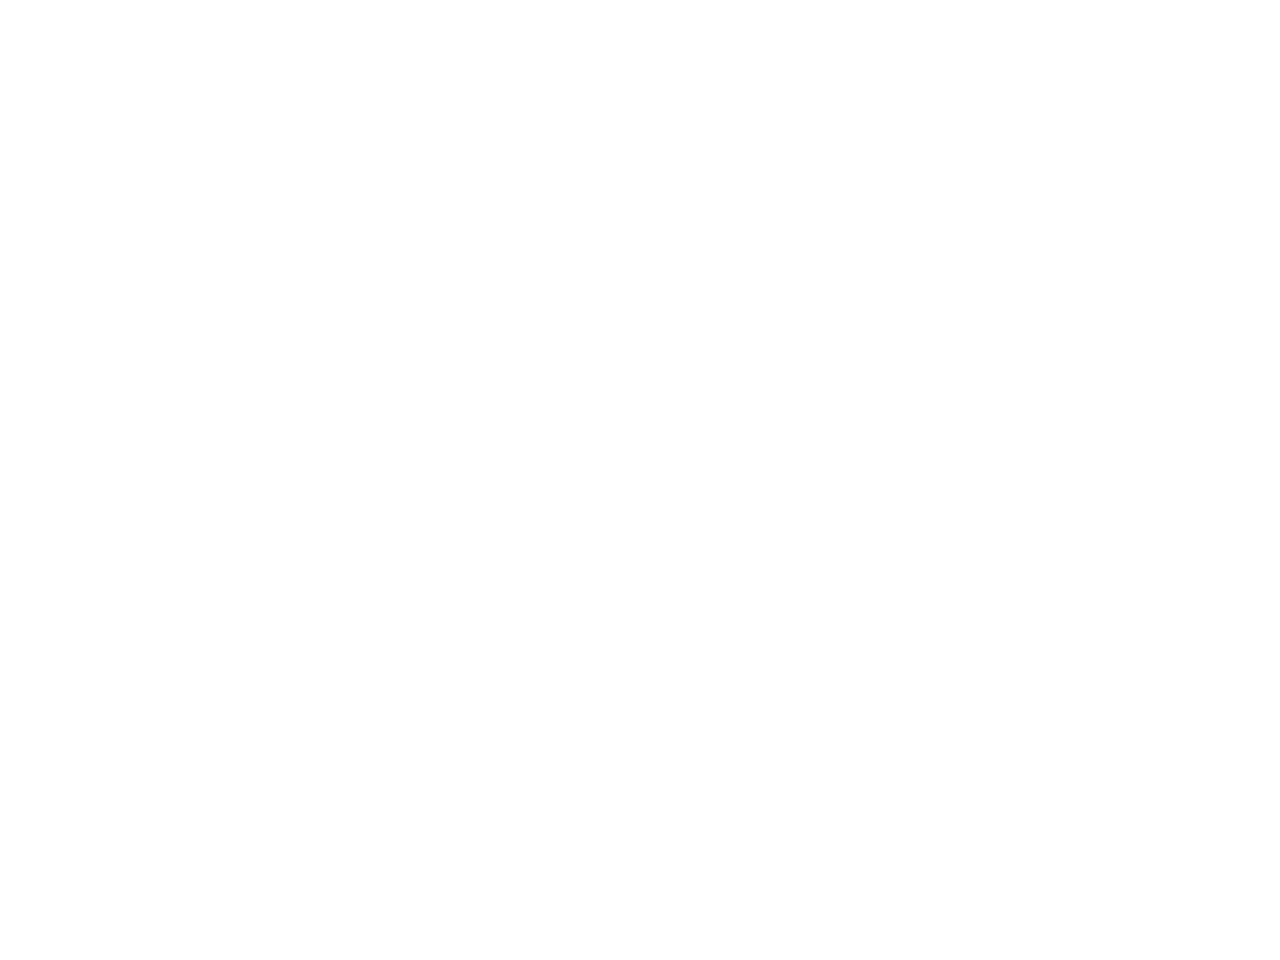

In [7]:
plot_cart_pole(env, obs);

# Experimentation

In [8]:
env.action_space

Discrete(2)

## Take 1 step right

[-0.0055582   0.15936656  0.01402256 -0.25054874]
1.0
False


<IPython.core.display.Javascript object>


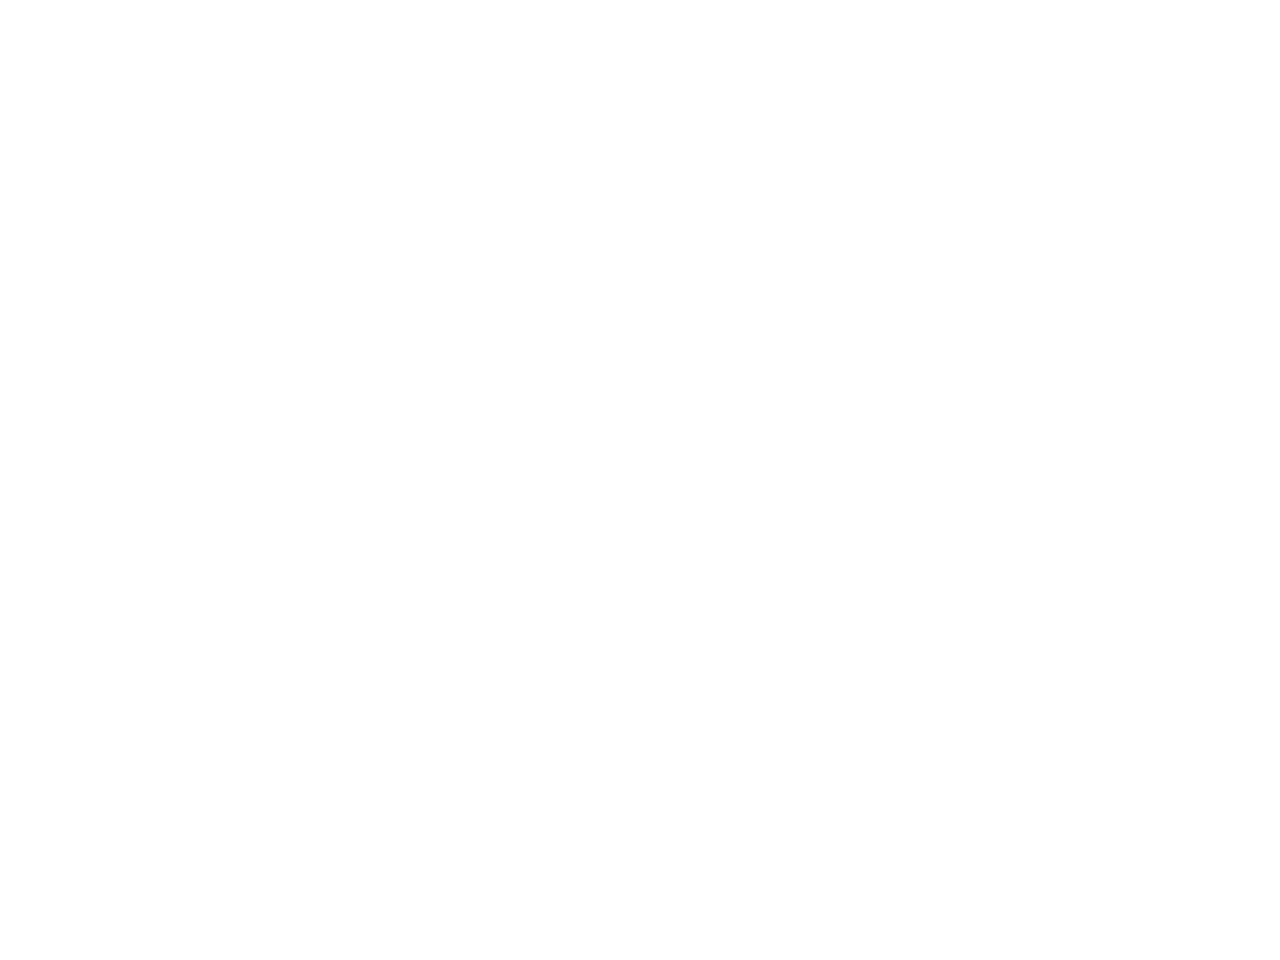

(-0.5, 599.5, 399.5, -0.5)

In [9]:
obs = env.reset()
obs, reward, done, info = env.step(1)
print(obs)
print(reward)
print(done)

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")

## Take 1 step left

[-0.00832166 -0.22566394 -0.01190638  0.2475522 ]
1.0
False


<IPython.core.display.Javascript object>


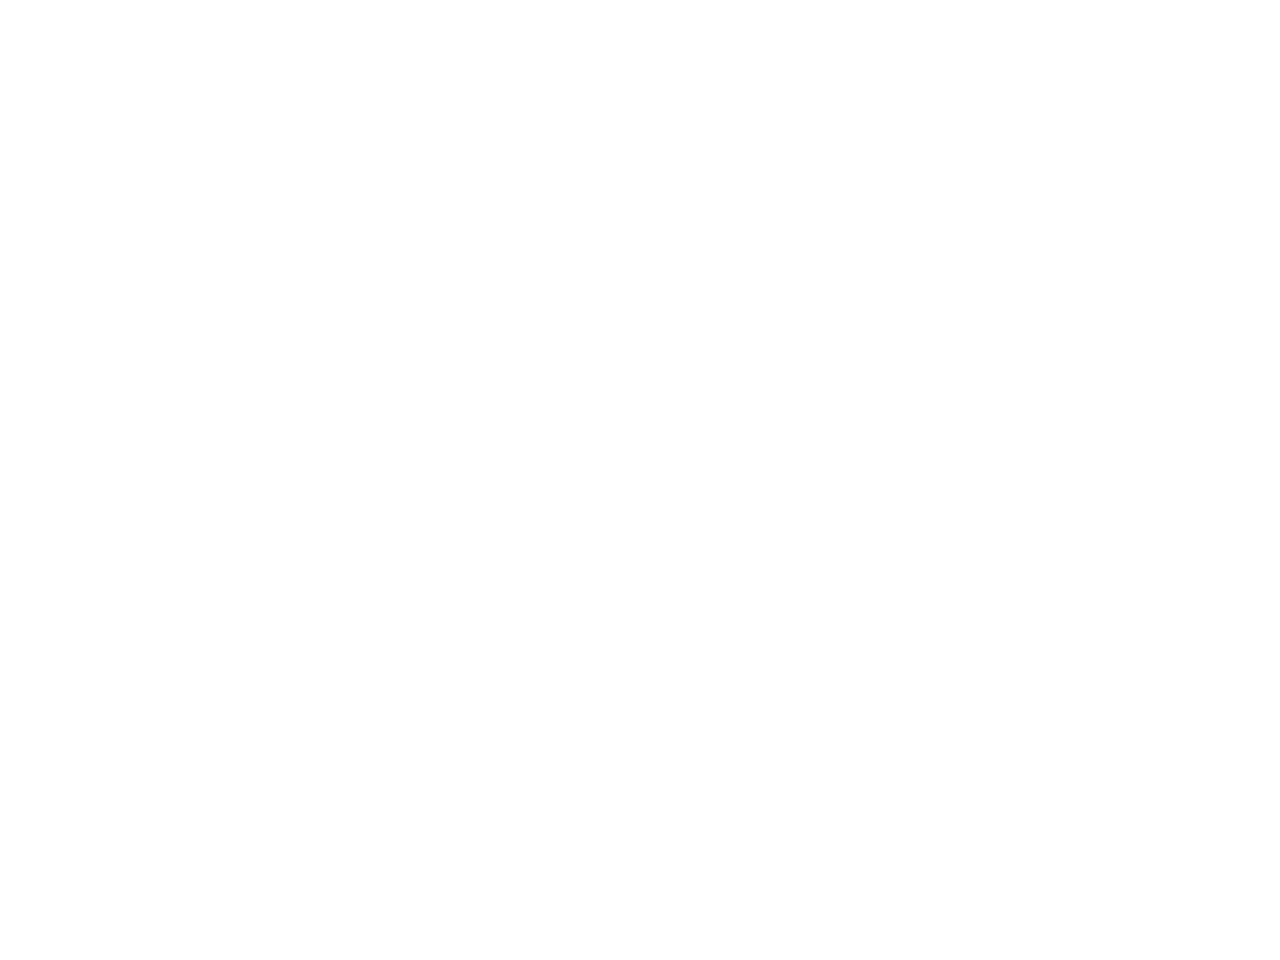

(-0.5, 599.5, 399.5, -0.5)

In [10]:
obs = env.reset()
obs, reward, done, info = env.step(0)
print(obs)
print(reward)
print(done)

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")

## Keep going left until fall

[ 0.02037718 -0.23083543 -0.01323524  0.28478621]
[ 0.01576047 -0.42576614 -0.00753952  0.57326562]
[ 0.00724515 -0.62078157  0.0039258   0.86356386]
[-0.00517048 -0.81595675  0.02119707  1.15747855]
[-0.02148962 -1.01134848  0.04434664  1.45673178]
[-0.04171659 -1.20698568  0.07348128  1.7629327 ]
[-0.0658563  -1.40285782  0.10873993  2.07753212]
[-0.09391346 -1.59890106  0.15029058  2.4017667 ]
[-0.12589148 -1.79498183  0.19832591  2.73659169]
[-0.16179112 -1.99087808  0.25305774  3.0826024 ]


<IPython.core.display.Javascript object>


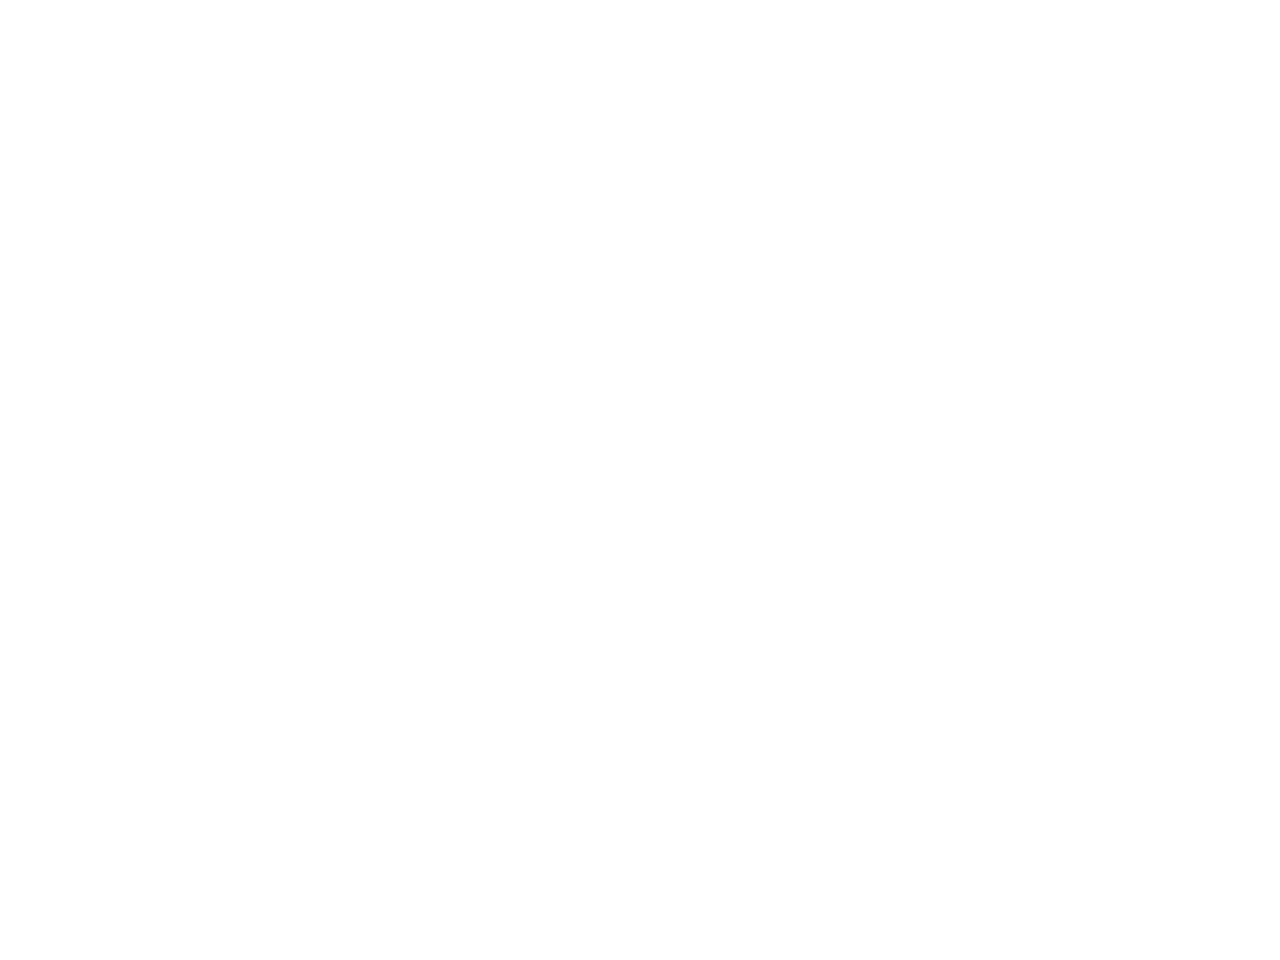

(-0.5, 599.5, 399.5, -0.5)

In [11]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(0)
    print(obs)
    if done:
        break

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")

## Keep going right until fall

[-0.0287408   0.22765101 -0.00449288 -0.28130156]
[-0.02418778  0.42283676 -0.01011891 -0.57539813]
[-0.01573105  0.61809909 -0.02162687 -0.87125154]
[-0.00336906  0.81350841 -0.03905191 -1.17065477]
[ 0.0129011   1.00911584 -0.062465   -1.47532055]
[ 0.03308342  1.2049429  -0.09197141 -1.78684104]
[ 0.05718228  1.40096937 -0.12770823 -2.1066395 ]
[ 0.08520167  1.59711875 -0.16984102 -2.43591177]
[ 0.11714404  1.79324143 -0.21855926 -2.77555651]


<IPython.core.display.Javascript object>


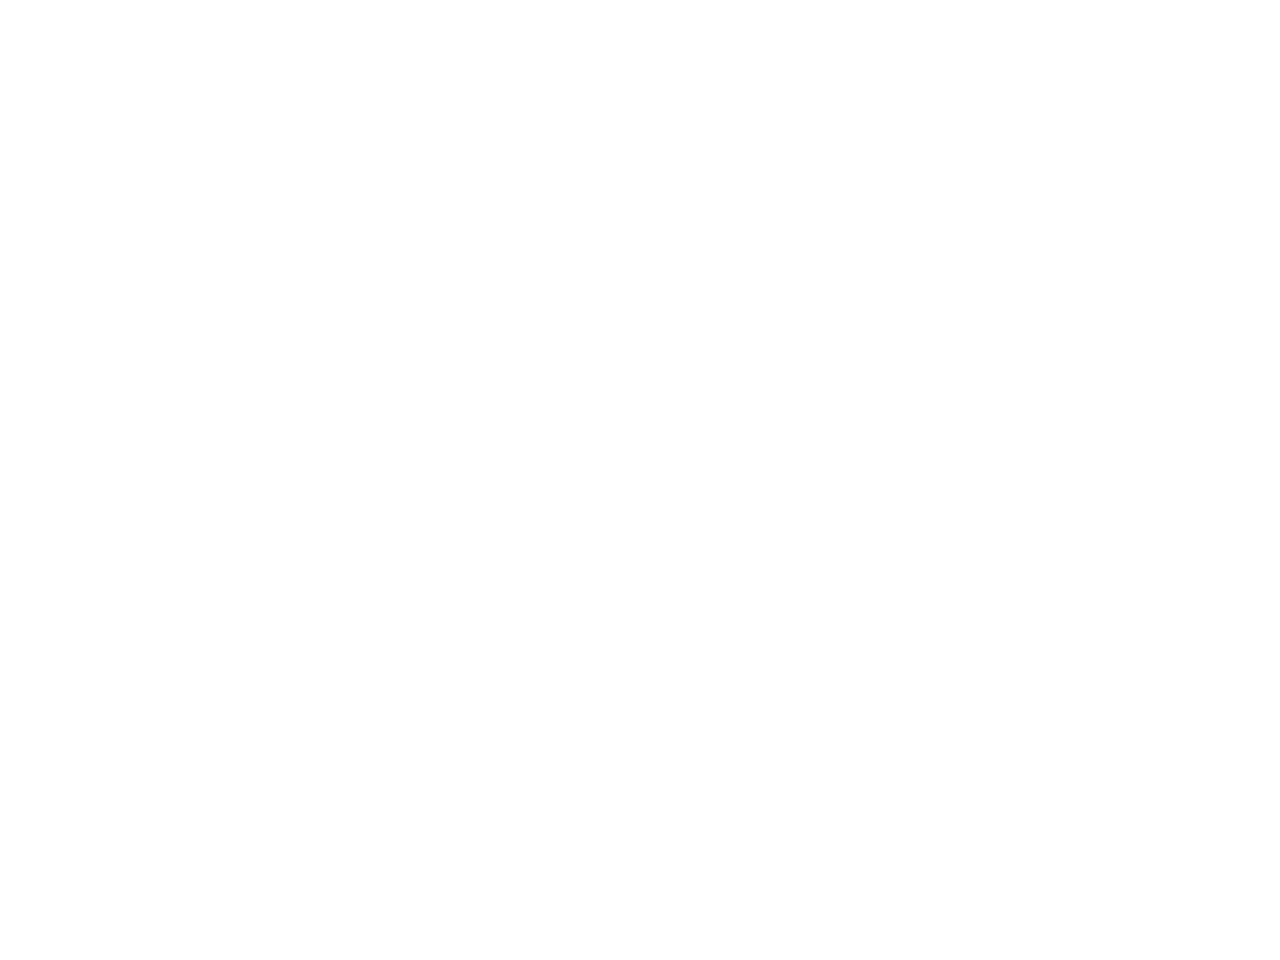

(-0.5, 599.5, 399.5, -0.5)

In [12]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(1)
    print(obs)
    if done:
        break

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")

# Improve Cart-Pole

## Animation functions

In [13]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

## Custom Policy
1. if angle and angular_velocity are both <0, then it is definitely failling left => move left to balance
2. if angle and angular_velocity are both >0, then it is definitely failling right => move right to balance
3. if above are both false => just move random for 1 step

In [14]:
def custom_policy(obs, env):
    ang = obs[2]
    ang_vel = obs[3]
    if ang<0 and ang_vel<0: # falling left => move left
        return 0
    if ang>0 and ang_vel>0: # falling right => move right
        return 1    
    return env.action_space.sample() # play randomly

In [15]:
print(env._max_episode_steps)

200


In [16]:
def run_policy(num_of_episodes, max_steps=None):
    if max_steps is not None:
        env._max_episode_steps = max_steps
    print("Max episode steps:", env._max_episode_steps)
    frames = []
    rewards = []
    for episode in range(num_of_episodes):
        episode_reward = 0
        obs = env.reset()
        for step in range(env._max_episode_steps):
            if episode==0: # check out 1 animation
                img = render_cart_pole(env, obs)
                frames.append(img)

            action = custom_policy(obs, env)
            obs, reward, done, info = env.step(action)        
            episode_reward += reward
            if done:            
                break
        rewards.append(episode_reward)
        print(episode, episode_reward)
    return rewards, frames

### Try with the definition of `solved` as per the docs – 100 consecutive trials with default max_episode_steps

In [17]:
rewards, frames = run_policy(100)

Max episode steps: 200
0 200.0
1 200.0
2 200.0
3 200.0
4 200.0
5 200.0
6 200.0
7 200.0
8 200.0
9 200.0
10 200.0
11 200.0
12 200.0
13 200.0
14 200.0
15 200.0
16 200.0
17 200.0
18 200.0
19 200.0
20 200.0
21 200.0
22 200.0
23 200.0
24 200.0
25 200.0
26 200.0
27 200.0
28 155.0
29 200.0
30 200.0
31 200.0
32 200.0
33 200.0
34 200.0
35 200.0
36 200.0
37 200.0
38 200.0
39 200.0
40 200.0
41 200.0
42 200.0
43 200.0
44 200.0
45 159.0
46 200.0
47 200.0
48 200.0
49 200.0
50 200.0
51 200.0
52 200.0
53 200.0
54 200.0
55 200.0
56 200.0
57 200.0
58 200.0
59 200.0
60 200.0
61 200.0
62 200.0
63 200.0
64 200.0
65 200.0
66 200.0
67 200.0
68 200.0
69 200.0
70 200.0
71 200.0
72 200.0
73 200.0
74 200.0
75 200.0
76 200.0
77 200.0
78 200.0
79 200.0
80 200.0
81 200.0
82 200.0
83 200.0
84 200.0
85 200.0
86 200.0
87 200.0
88 200.0
89 200.0
90 200.0
91 130.0
92 200.0
93 200.0
94 200.0
95 177.0
96 200.0
97 200.0
98 200.0
99 200.0


In [18]:
np.mean(rewards), np.std(rewards), np.min(rewards), np.max(rewards)

(198.21, 9.388604795175908, 130.0, 200.0)

<IPython.core.display.Javascript object>


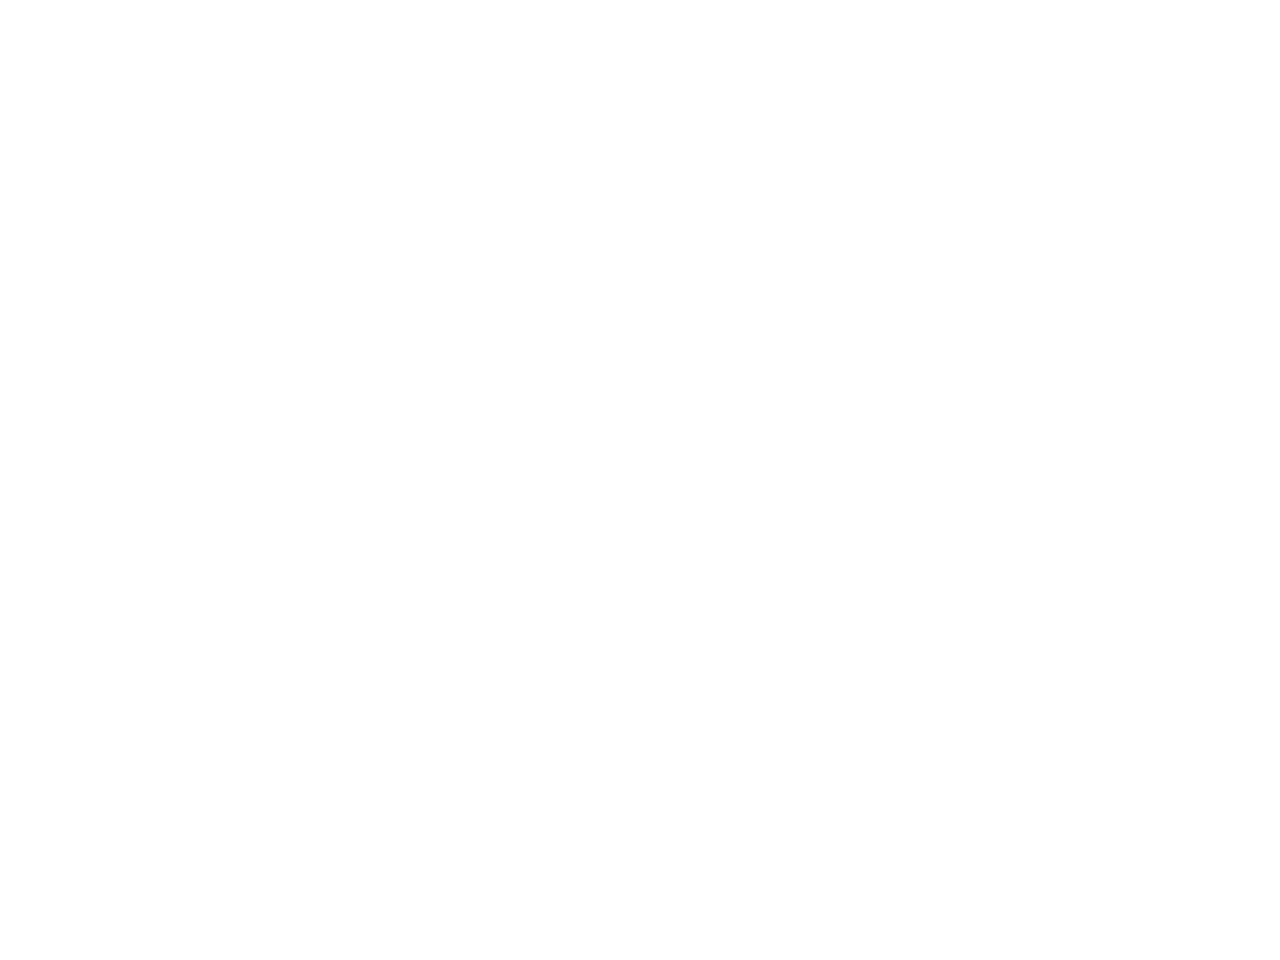

In [19]:
video = plot_animation(frames)
plt.show()

### Try with 100 consecutive trials with max_episode_steps as 1000

In [20]:
rewards, frames = run_policy(100, 1000)

Max episode steps: 1000
0 1000.0
1 1000.0
2 1000.0
3 807.0
4 319.0
5 1000.0
6 279.0
7 783.0
8 473.0
9 528.0
10 746.0
11 433.0
12 313.0
13 989.0
14 677.0
15 485.0
16 392.0
17 520.0
18 1000.0
19 537.0
20 1000.0
21 1000.0
22 268.0
23 617.0
24 1000.0
25 477.0
26 927.0
27 491.0
28 509.0
29 609.0
30 307.0
31 789.0
32 643.0
33 304.0
34 993.0
35 656.0
36 304.0
37 269.0
38 569.0
39 1000.0
40 1000.0
41 373.0
42 650.0
43 355.0
44 1000.0
45 841.0
46 1000.0
47 451.0
48 1000.0
49 395.0
50 1000.0
51 377.0
52 556.0
53 370.0
54 849.0
55 344.0
56 412.0
57 434.0
58 363.0
59 362.0
60 547.0
61 718.0
62 1000.0
63 415.0
64 220.0
65 424.0
66 824.0
67 531.0
68 581.0
69 1000.0
70 427.0
71 531.0
72 603.0
73 1000.0
74 606.0
75 416.0
76 413.0
77 546.0
78 649.0
79 361.0
80 735.0
81 826.0
82 311.0
83 545.0
84 842.0
85 1000.0
86 451.0
87 503.0
88 1000.0
89 215.0
90 786.0
91 373.0
92 303.0
93 764.0
94 304.0
95 701.0
96 202.0
97 309.0
98 604.0
99 333.0


In [21]:
np.mean(rewards), np.std(rewards), np.min(rewards), np.max(rewards)

(610.64, 256.5750385364874, 202.0, 1000.0)

<IPython.core.display.Javascript object>


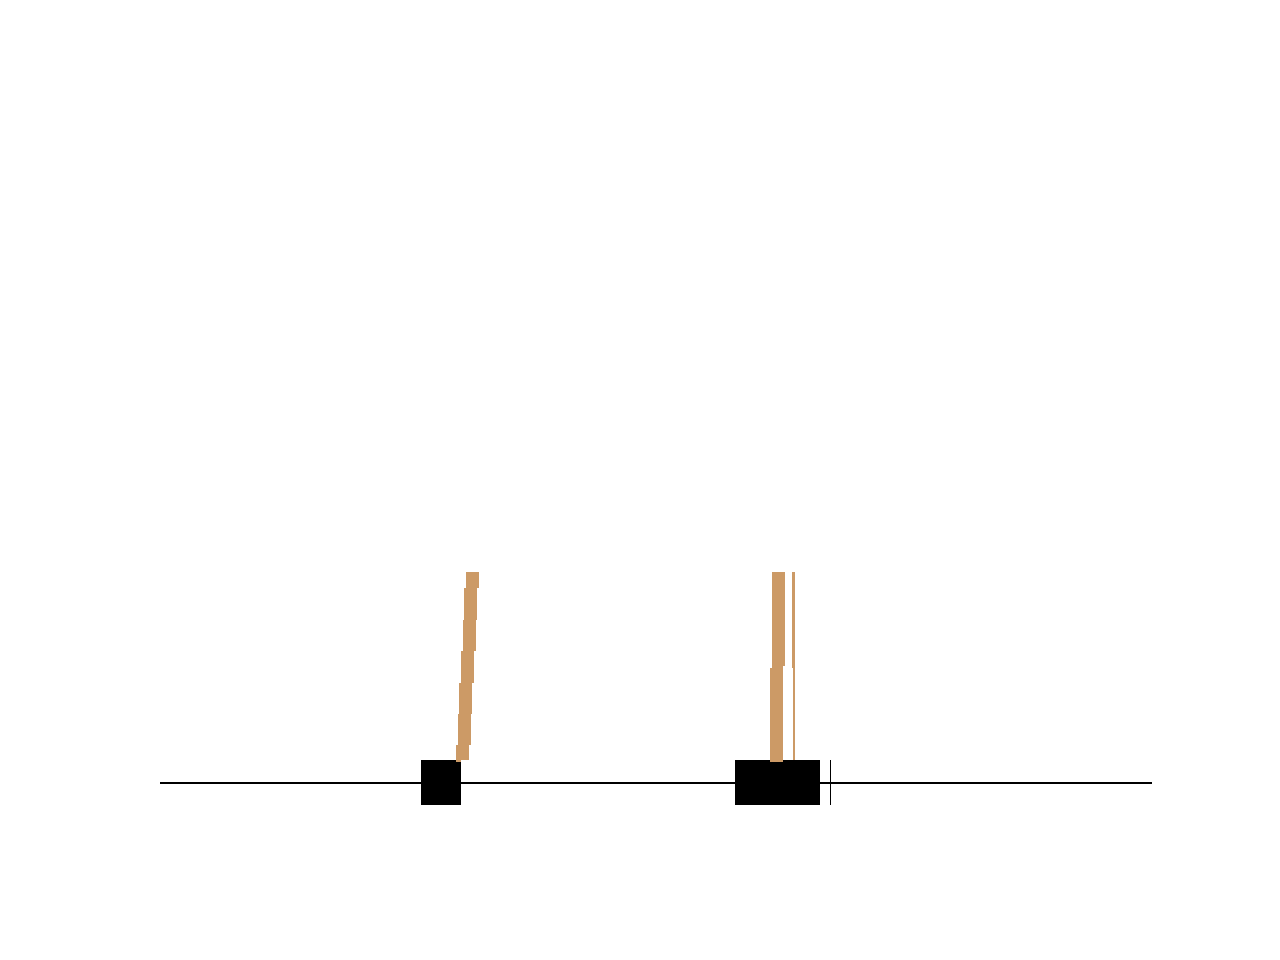

In [22]:
video = plot_animation(frames)
plt.show()